In [2]:
import numpy as np
import pandas as pd
import rie_estimator
import scipy.spatial.distance as ssd
from hcaa_implementation import hcaa_alocation
from scipy.cluster.hierarchy import fcluster, linkage
from sklearn.metrics import calinski_harabasz_score

In [3]:
prices = pd.read_csv(
    "/home/dum/Desktop/data/sp_500_original_clean.csv",
    index_col="Date",
    parse_dates=True,
)

In [4]:
returns = (np.log(prices) - np.log(prices.shift(1))).iloc[1:]

Seleccionamos un periodo de tiempo de q = 1/2

In [6]:
selected_returns = returns.iloc[460*2:460*4, :]

In [7]:
selected_returns.shape

(920, 460)

Primero hay que calcular la distancia de mantegna, para lo que es necesario primero calcular el estimador de la matriz de correlación

In [8]:
est_rie = rie_estimator.get_rie(returns=selected_returns, normalize=True, max_ones=True)

In [9]:
est_muestral = np.corrcoef(selected_returns.T)

Luego hay que calcular la distancia de Mantegna con la matriz que acabamos de obtener

In [10]:
D_matrix = np.sqrt(2*(1- est_muestral))
D_matrix = np.around(D_matrix, decimals=7)
D_condensed = ssd.squareform(D_matrix)

Obtenemos la estructura de datos necesaria para aplicar el clustering jerárquico:

In [11]:
Z = linkage(D_condensed, 'ward', optimal_ordering = True)

Se obtiene el score para cuando suponemos 20 grupos en los 460 activos:

In [12]:
labels = fcluster(Z, 20, criterion='maxclust')

Es indice de calinski harabasz es de 7.78, por lo que 

In [13]:
calinski_harabasz_score(selected_returns.T, labels)

7.782422853047737

El índice de calinski harabas es mejor mientras menor sea. A continuación se prueban grupos desde 2 hasta 460

In [24]:
indices = []

for i in range(2, 460):
    labels = fcluster(Z, i, criterion='maxclust')
    indices.append(calinski_harabasz_score(selected_returns.T, labels))

Se puede observar que el menor valor es de 3.96

In [25]:
min(indices)

3.965367214737812

Este valor se obtiene cuando se tienen 227 grupos de activos.

In [26]:
from numpy import argmin


argmin(indices)

225

<AxesSubplot:>

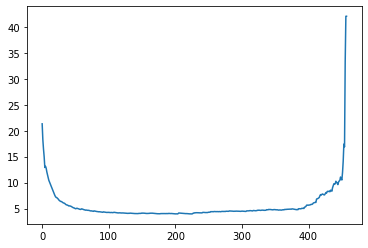

In [18]:
pd.Series(indices).plot()

<AxesSubplot:>

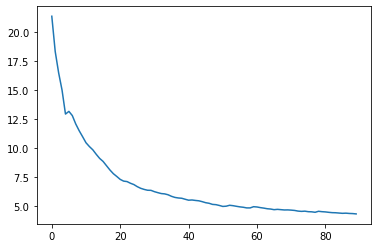

In [20]:
pd.Series(indices)[:90].plot()

AEE - Utilities _electric
AEP - Regulated Electric
ATO - Regulated Gas
AWK - Regulated Water
CMS - Regulated Electric
D - Regulated Electric
DTE - Regulated Electric
DUK - Regulated Electric
ED - Regulated Electric
ES - Regulated Electric


In [21]:
selected_returns.loc[:, labels == 3] 

,SRE
Date,
2015-08-31,-0.026119
2015-09-01,-0.028120
2015-09-02,-0.002388
2015-09-03,0.014996
2015-09-04,-0.008063
...,...
2019-04-12,0.013569
2019-04-15,-0.009984
2019-04-16,-0.010085


In [22]:
selected_returns.loc[:, labels == 23] 

,ETR
Date,
2015-08-31,-0.008687
2015-09-01,-0.035365
2015-09-02,-0.004769
2015-09-03,0.003658
2015-09-04,-0.023451
...,...
2019-04-12,0.002313
2019-04-15,-0.001997
2019-04-16,-0.017619


Si seleccionamos los 227 grupos:

In [31]:
labels = fcluster(Z, 227, criterion='maxclust')

In [32]:
calinski_harabasz_score(selected_returns.T, labels)

3.965367214737812

El problema es que si se elige el número óptimo de grupos según el índice, muchos grupos (125) solo tienen un activo.

In [39]:
(pd.Series(labels).value_counts() == 1).sum()

125

In [43]:
(pd.Series(labels).value_counts()).sort_values()

45      1
28      1
29      1
30      1
31      1
       ..
69      6
164     7
205     8
217    13
5      18
Length: 227, dtype: int64

La mayor parte de los clusters tienen pocos activos. 

<AxesSubplot:>

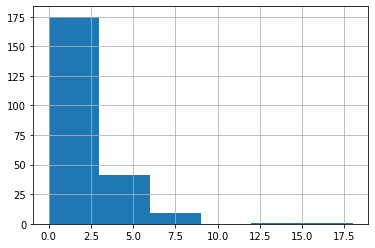

In [44]:
(pd.Series(labels).value_counts()).hist(bins = [0, 3, 6, 9, 12, 15,18])

Repetimos el proceso con el 

In [46]:
returns_european = pd.read_csv(
    "/home/dum/Desktop/data/european_market_returns.csv",
    index_col="Date",
    parse_dates=True,
)

In [52]:
selected_returns = returns_european.iloc[270*2:270*4, :]

In [53]:
selected_returns.shape

(540, 270)

In [54]:
est_muestral = np.corrcoef(selected_returns.T)

In [49]:
D_matrix = np.sqrt(2*(1- est_muestral))
D_matrix = np.around(D_matrix, decimals=7)
D_condensed = ssd.squareform(D_matrix)

In [55]:
Z = linkage(D_condensed, 'ward', optimal_ordering = True)

In [74]:
indices = []

for i in range(2, 270):
    labels = fcluster(Z, i, criterion='maxclust')
    indices.append(calinski_harabasz_score(selected_returns.T, labels))

In [75]:
min(indices)

2.8592907600364663

El número óptimo es de 216 grupos

In [76]:
from numpy import argmin


argmin(indices)

216

In [60]:
indices

[7.399122738643377,
 8.368013032933883,
 6.822485567894037,
 9.299435122538652,
 8.044601150299748,
 7.0677027646613055,
 6.943375459109169,
 6.489354087530683,
 6.491861240157609,
 6.382384405664939,
 6.105995606912485,
 5.842282032646904,
 5.504406957286967,
 5.313041892902822,
 5.26568800338601,
 5.321392309589775,
 5.287083283825178,
 5.137834912133356,
 5.016397086825068,
 4.846020793342237,
 4.7196424434005895,
 4.546920413711285,
 4.4116367767407985,
 4.331862014946509,
 4.222380784436186,
 4.0915414158963825,
 4.027664713955235,
 4.074341126036122,
 3.988631980406165,
 3.881251634234526,
 3.82259427528044,
 3.756380273235732,
 3.7045893068175757,
 3.699082138717949,
 3.6544508126448054,
 3.7303381292481137,
 3.646379181334698,
 3.557018833260013,
 3.519132584053315,
 3.453875126740166,
 3.4024622602189822,
 3.4391570458056657,
 3.4324319927252707,
 3.3948689192871293,
 3.3863603674673026,
 3.5155995754221627,
 3.516164148997203,
 3.489392708775864,
 3.514817099061302,
 3.544945

<AxesSubplot:>

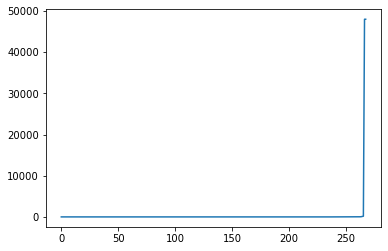

In [59]:
pd.Series(indices).plot()

<AxesSubplot:>

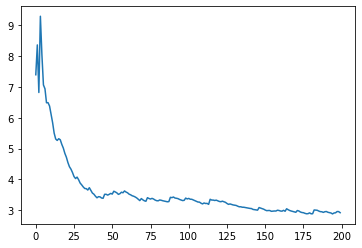

In [61]:
pd.Series(indices)[:200].plot()

In [77]:
labels = fcluster(Z, 216, criterion='maxclust')

In [79]:
(pd.Series(labels).value_counts() == 1).sum()

179